In [ ]:
# Author: Bahram Jafrasteh

# Student Alcohol Consumption

## Imports

Useful python library

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import pandas as pd
import seaborn as sns
import os.path
import math
import os
import csv
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# for K-fold cross validation in NN
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from tabulate import tabulate
from scipy import stats

# Loading the data from data path

In [2]:
data_path = "Data/"
os.path.exists(data_path)
raw_math = pd.read_csv(data_path + "student-mat.csv")
raw_por = pd.read_csv(data_path + "student-por.csv")
data_por = raw_por
data_math = raw_math

# About the data

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – 
higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', 

school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad 
to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)
These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)


https://www.kaggle.com/uciml/student-alcohol-consumption

# Data portuguese language courses

# Check the data for missing values

Check if there is any na or null values in the data set

In [4]:
print(data_por.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
print(data_por.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


As we do not have missing values in this data set we do not deal with that.
But If we had missing values there are different methods for replacing them.
one of the simplest one is SimpleImputer from Sklearn library
that you can use mean, median, constant and other types of replacement for missing values.

# Describing the data

Extract numerical and categorical columns in the data

In [6]:
num_cols = data_por._get_numeric_data().columns
cols = data_por.columns
cat_cols = set(cols) - set(num_cols)

Showing simple statistics of categorical data set

In [7]:
for h in cat_cols:
    print(data_por[h].describe())
    print("\n")

count     649
unique      2
top       yes
freq      498
Name: internet, dtype: object


count     649
unique      2
top       yes
freq      580
Name: higher, dtype: object


count     649
unique      2
top       yes
freq      398
Name: famsup, dtype: object


count        649
unique         3
top       mother
freq         455
Name: guardian, dtype: object


count     649
unique      2
top        no
freq      334
Name: activities, dtype: object


count     649
unique      2
top        no
freq      610
Name: paid, dtype: object


count     649
unique      2
top        no
freq      410
Name: romantic, dtype: object


count       649
unique        5
top       other
freq        367
Name: Fjob, dtype: object


count        649
unique         4
top       course
freq         285
Name: reason, dtype: object


count     649
unique      2
top        GP
freq      423
Name: school, dtype: object


count     649
unique      2
top         T
freq      569
Name: Pstatus, dtype: object


count     649
u

Describing statistics of numerical part of the data set

In [8]:
data_por[num_cols].describe().unstack()

age         count    649.000000
            mean      16.744222
            std        1.218138
            min       15.000000
            25%       16.000000
            50%       17.000000
            75%       18.000000
            max       22.000000
Medu        count    649.000000
            mean       2.514638
            std        1.134552
            min        0.000000
            25%        2.000000
            50%        2.000000
            75%        4.000000
            max        4.000000
Fedu        count    649.000000
            mean       2.306626
            std        1.099931
            min        0.000000
            25%        1.000000
            50%        2.000000
            75%        3.000000
            max        4.000000
traveltime  count    649.000000
            mean       1.568567
            std        0.748660
            min        1.000000
            25%        1.000000
            50%        1.000000
                        ...    
absences

# Converting categorical data

There are various method for using categorical data in the computation. 
Onehot encodig is one of the most commonly used method.
We use this method here.

In [9]:
# conver categorical data to numerical one using onehot encoding method
def ConvertToNum_dummies(data_in, cat_cols):
    data_out = data_in
    for num_cl in data_in.head():
        # if the column is categorical then change it
        if num_cl in cat_cols:
            un = data_out[num_cl].unique()
            for i in range(len(un)):
                # index of the data that are equal to un[i]
                indices = [j for j, s in enumerate(data_in[num_cl]) if un[i] in s]
                # new name of the column
                num_cl_new = num_cl+'_'+un[i]
                # generate output data
                data_out[num_cl_new] = np.zeros((np.shape(data_in[num_cl])), dtype=int)
                data_out.loc[indices, num_cl_new] = 1
            # remove the old column
            data_out.__delitem__(num_cl)
    return data_out

In [10]:
data_por = ConvertToNum_dummies(data_por, cat_cols)
cols = data_por.columns

# Outlier Detection

A methodology based on local density deviation of the data by considering the neighbour samples is considered to select
outlier and remove them from the data set.

In [11]:
# The function inputs are data, num_cls: the header name of the column that is going to be checked for outiler
# and the header names of categorical columns
# The output is the output data after removing the outlier
def Outlier_Detection(data_in):
    data_out = data_in
    clf = LocalOutlierFactor(n_neighbors=50, contamination=0.05)
    y_pred = clf.fit_predict(data_out)
    r = y_pred < 0
    if sum(r) > 0:
        print('{}'.format(
            sum(r)) + " rows from variables have been recognised as outlier and was removed")
        data_out.drop(data_out.index[r], inplace=True)
    return data_out


In [12]:
data_por = Outlier_Detection(data_por)

33 rows from variables have been recognised as outlier and was removed


# Pairplot

Pairplot between average grade and dailay and weekend student alcohol consumption 

In [13]:
data_por['AG'] = (data_por['G1'] + data_por['G2'] + data_por['G3'])/3.0

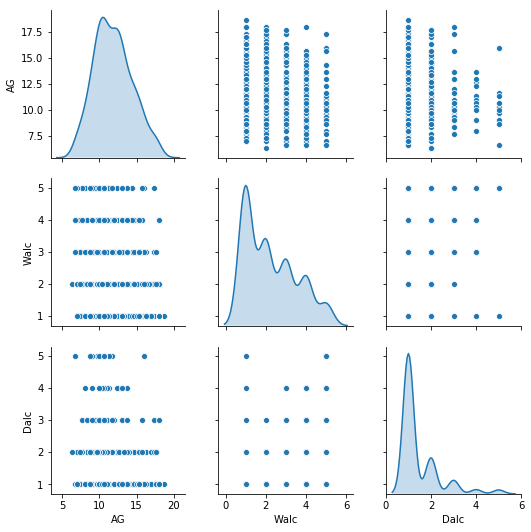

In [14]:
sns.pairplot(data_por[['AG', 'Walc', 'Dalc']], diag_kind="kde")

From the plot it is clear that the student who their usage of alcohol during the week is high have lower average grade

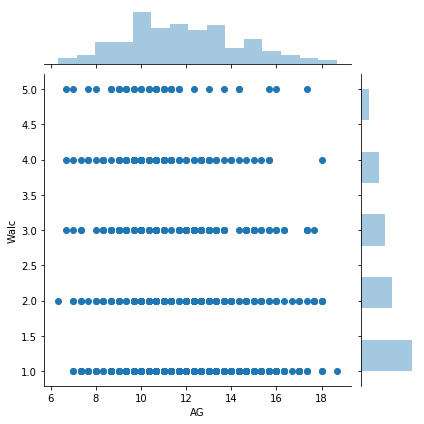

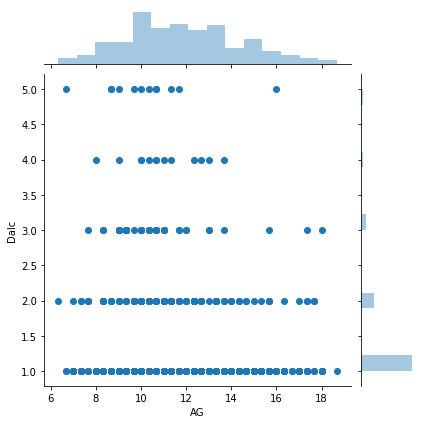

In [15]:
sns.jointplot(x=data_por['AG'], y=data_por['Walc'])
sns.jointplot(x=data_por['AG'], y=data_por['Dalc'])

From these plots one can conclude that some student that have low usage of alcohol during the week and or weekend have different ranges of average grade.
The distribution of average grades for this students is probably comes from the mixed of two normal population.

# Data math courses

# Check the data math for missing values

Check if there is any na or null values in the data set

In [16]:
print(data_math.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [17]:
print(data_math.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


As it is clear we do not have any missing value to be dealt with

# Describing the data

Here we show some statistics of the categorical and numerical part of the data

In [18]:
num_cols = data_math._get_numeric_data().columns
cols = data_math.columns
cat_cols = set(cols) - set(num_cols)

In [19]:
for h in cat_cols:
    print(data_math[h].describe())
    print("\n")

count     395
unique      2
top       yes
freq      329
Name: internet, dtype: object


count     395
unique      2
top       yes
freq      375
Name: higher, dtype: object


count     395
unique      2
top       yes
freq      242
Name: famsup, dtype: object


count        395
unique         3
top       mother
freq         273
Name: guardian, dtype: object


count     395
unique      2
top       yes
freq      201
Name: activities, dtype: object


count     395
unique      2
top        no
freq      214
Name: paid, dtype: object


count     395
unique      2
top        no
freq      263
Name: romantic, dtype: object


count       395
unique        5
top       other
freq        217
Name: Fjob, dtype: object


count        395
unique         4
top       course
freq         145
Name: reason, dtype: object


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object


count     395
unique      2
top         T
freq      354
Name: Pstatus, dtype: object


count     395
u

In [20]:
data_math[num_cols].describe().unstack()

age         count    395.000000
            mean      16.696203
            std        1.276043
            min       15.000000
            25%       16.000000
            50%       17.000000
            75%       18.000000
            max       22.000000
Medu        count    395.000000
            mean       2.749367
            std        1.094735
            min        0.000000
            25%        2.000000
            50%        3.000000
            75%        4.000000
            max        4.000000
Fedu        count    395.000000
            mean       2.521519
            std        1.088201
            min        0.000000
            25%        2.000000
            50%        2.000000
            75%        3.000000
            max        4.000000
traveltime  count    395.000000
            mean       1.448101
            std        0.697505
            min        1.000000
            25%        1.000000
            50%        1.000000
                        ...    
absences

# Converting categorical data

Convert the data using onehot enconder method

In [21]:
data_math = ConvertToNum_dummies(data_math, cat_cols)
cols = data_math.columns

# Multivariate outlier detection and removing

In [22]:
data_math = Outlier_Detection(data_math)

20 rows from variables have been recognised as outlier and was removed


# Drawing some plots

Compute average grade of the math student

In [23]:
data_math['AG'] = (data_math['G1'] + data_math['G2'] + data_math['G3'])/3.0

Drawing pair plot for average grade, weekend alcohol consumption and daily alcohol consumption

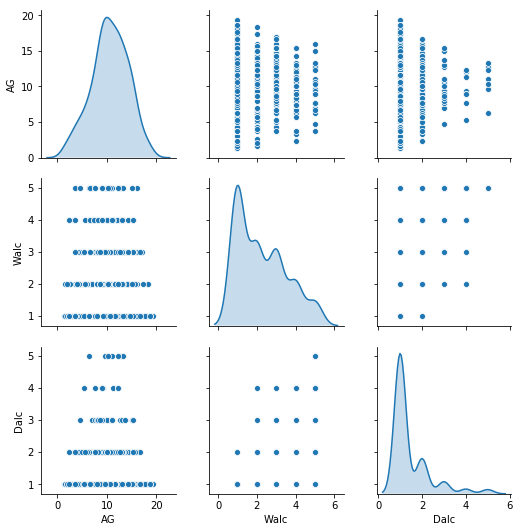

In [24]:
sns.pairplot(data_math[['AG', 'Walc', 'Dalc']], diag_kind="kde")

This plot shows that the average grade of some of the student who has high daily alchol consumption is more than ten.
Student who has low daily and weeked usage of alcohol does have different ranges of grades.

Below we use joint plot as another way of representing the data

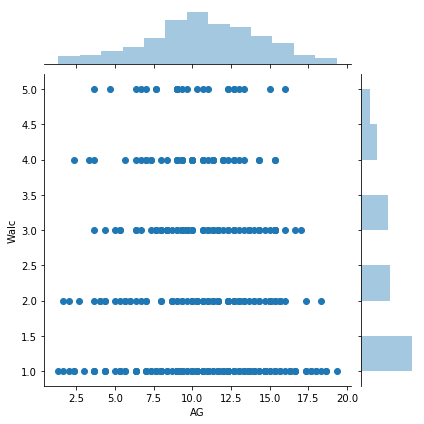

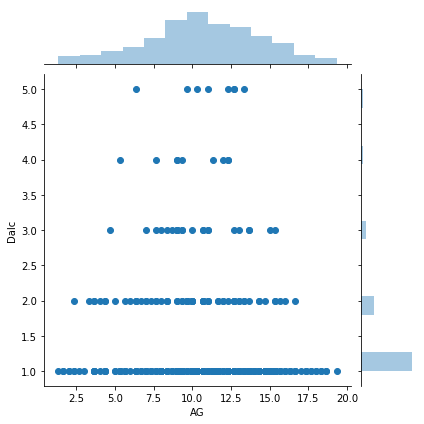

In [25]:
sns.jointplot(x=data_math['AG'], y=data_math['Walc'])
sns.jointplot(x=data_math['AG'], y=data_math['Dalc'])

The distribution of the average grade data for this population comes from a normal population

# Merging the data

We here employ Mann-Whitney U Test to check if we can merge two data set. The p-value would let us knwo that if two data set are from the same distribtion or not.

In [26]:
stats.mannwhitneyu(data_por['Walc'], data_math['Walc'])

MannwhitneyuResult(statistic=115241.5, pvalue=0.47546196169368526)

The provided pvalue for comparing weekend alcohol consumption of the students indicate that our initial hypothesis is true and we can combine these data.

In [28]:
stats.mannwhitneyu(data_por['Dalc'], data_math['Dalc'])

MannwhitneyuResult(statistic=114956.5, pvalue=0.4379827769423332)

The provided pvalue for daily alcohlo consumption indicate the same distribution.

As Dalc and Walc are considered the most important parameters for this problem we merge the available data from a survey of students math and portuguese language courses in secondary school.

In [29]:
data_all = pd.concat([data_math, data_por], sort=False)

# Some statistics

We generate joint plot and pair plot to find the distribution and relationship among average grade and alcohol consumption.

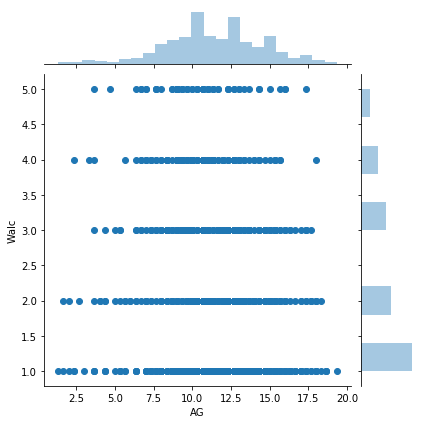

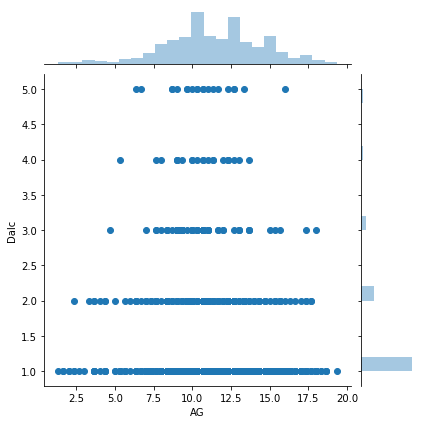

In [30]:
sns.jointplot(x=data_all['AG'], y=data_all['Walc'])
sns.jointplot(x=data_all['AG'], y=data_all['Dalc'])

The distributon of the combined data set is from a mixed normal population.

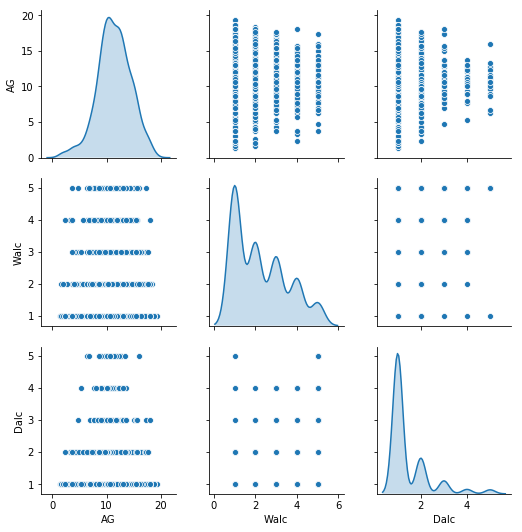

In [31]:
sns.pairplot(data_all[['AG', 'Walc', 'Dalc']], diag_kind="kde")

These plots reveal that average grades of the students who has high usage of daily alchol consumption is about average.
It also can be inferred that weekend alchol consumption can not have a very important effect on average grades of the students.
There is not a robust correlation between weekend alchol consumption and daily consumption.
Both daily and weekend alcohol consumptioner are from mixed normal populations.

We also generate a heat map to show the correlation among different varialbes used in this study

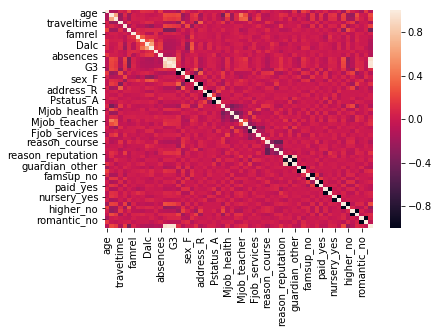

In [32]:
sns.heatmap(data = data_all.corr()) 

The absolute value of the correlation is important. The higher absolute value of the correlation between two varialble indicates that the one of them can have strong effect on the other one.

# Separating data to training and test subsets

In this part we divide the dat into traing and testing part to apply some ML methods on them

In [33]:
data_total = data_all.astype('float64')
# target dat
y = data_total['AG']
cols = data_total.columns
target_inds = ['AG', 'G1', 'G2', 'G3']
cols = cols.drop(target_inds)

In [34]:
# input data
X = data_total[cols]

Dividing training and test data set while keeping index of traing and test

In [35]:
# indices of the traing and test
indices_data = range(len(data_total))
X_train, X_test, y_train, y_test,ind_train, ind_test = train_test_split(X, y, indices_data, test_size=0.2, random_state = 42)

# Data preprocessing

There are various methods to scale the data.
One of the most common method is scale the data by removing the mean and scaling to unit variance

In [36]:
# scale input data using StandardScaler from SKlearn
XScaler = StandardScaler()
XScaler.fit(X_train)
X_train = XScaler.transform(X_train)
X_test = XScaler.transform(X_test)

# scale output data using StandardScaler from SKlearn
YScaler = StandardScaler()
YScaler.fit(y_train.values.reshape(-1,1))
y_train = YScaler.transform(y_train.values.reshape(-1,1))
y_test = YScaler.transform(y_test.values.reshape(-1,1))

Get the number of samples and features in the training set

In [37]:
train_size, train_dim = np.shape(X_train)

# Fit a linear model to the data

Here we use tensorflow package to fit a linear model as the simplest and basice model for estimating the average grade of the students.

Defining place holder input variable 

In [38]:
x = tf.placeholder(tf.float32, [None, train_dim])

Defining place holder output varialbe

In [39]:
ytrue = tf.placeholder(tf.float32, [None, 1])

Make a linear model

In [40]:
lm = {'weights': tf.Variable(tf.random_normal([train_dim,1])),
                  'biases':tf.Variable(tf.random_normal([1]))}
y_pred = tf.add(tf.matmul(x, lm['weights']),lm['biases'])

Create a denominator variable for computing mean squarred error of the cost function

In [41]:
dnm = tf.Variable(tf.ones([1]), name= 'denom')

Mean squarred error is considered as cost function to be optimized

In [42]:
cost = tf.reduce_sum(tf.pow(y_pred-ytrue, 2))/(2.0*dnm)

We used gradient descend to optimze the parameters of the algorithm

In [43]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

Definig numbr of iteration in the algorithm

In [44]:
num_itr = 1000
display_step = 20

# Tensorflow RUN

We create a tensorflow session to execute the graph

In [45]:
session = tf.Session()

Initializing the variables

In [46]:
session.run(tf.global_variables_initializer())

In [47]:
# optimizing the parameter
def optimize(num_itr):
    for epoch in range(num_itr):
        for (xx,yy) in zip(X_train, y_train):
            feed_dict_train = {x: xx.reshape(1, train_dim),
                               ytrue: yy.reshape(1, 1)}
            # Running the optimizer using feed dict train 
            session.run(optimizer, feed_dict=feed_dict_train)
        if (epoch+1) % display_step == 0:
            cost_val = session.run(cost, feed_dict = {x: X_train,
                                                      ytrue:y_train,
                                                      dnm: np.asarray([train_size])}
                                   )
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{}".format(cost_val[0]))


feed dict for test subset

In [48]:
feed_dict_test = {x: X_test,
                  ytrue: y_test,
                  dnm: np.asarray([len(y_test)])}

Initial value of MSE for test subset

In [49]:
y_pred_test_LM = session.run(y_pred, feed_dict={x: X_test})
metrics.mean_squared_error(y_test, y_pred_test_LM)

54.829828679384285

In [51]:
optimize(num_itr=1000)

Epoch: 0020 cost= 0.3807584345340729
Epoch: 0040 cost= 0.37906888127326965
Epoch: 0060 cost= 0.37770524621009827
Epoch: 0080 cost= 0.3765740394592285
Epoch: 0100 cost= 0.3756154477596283
Epoch: 0120 cost= 0.374788373708725
Epoch: 0140 cost= 0.37406498193740845
Epoch: 0160 cost= 0.3734247088432312
Epoch: 0180 cost= 0.3728526830673218
Epoch: 0200 cost= 0.37233680486679077
Epoch: 0220 cost= 0.37186816334724426
Epoch: 0240 cost= 0.3714403808116913
Epoch: 0260 cost= 0.37104666233062744
Epoch: 0280 cost= 0.3706832230091095
Epoch: 0300 cost= 0.3703458309173584
Epoch: 0320 cost= 0.3700311779975891
Epoch: 0340 cost= 0.36973729729652405
Epoch: 0360 cost= 0.3694618344306946
Epoch: 0380 cost= 0.36920246481895447
Epoch: 0400 cost= 0.3689576983451843
Epoch: 0420 cost= 0.36872631311416626
Epoch: 0440 cost= 0.36850714683532715
Epoch: 0460 cost= 0.3682990074157715
Epoch: 0480 cost= 0.3681011497974396
Epoch: 0500 cost= 0.3679124414920807
Epoch: 0520 cost= 0.3677322268486023
Epoch: 0540 cost= 0.367559790

Computing correlation coefficient among real and estimated values

In [52]:
y_pred_test_LM = session.run(y_pred, feed_dict={x: X_test})
CC = np.corrcoef(y_test.reshape(1,len(y_test)),y_pred_test_LM.reshape(1,len(y_test)))
print("Correlation coefficient between predicted value and real value is {}".format(CC[0]))

Correlation coefficient between predicted value and real value is [1.         0.49665187]


Computing mset test value after optimization

In [53]:
metrics.mean_squared_error(y_test, y_pred_test_LM)

0.7228837834199962

Scatter plot of the estimated grade vs observed grade

[Text(0, 0.5, 'Estimated Grade'), Text(0.5, 0, 'Real Grade')]

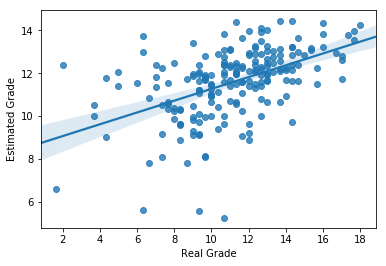

In [54]:
y_pred_test_LM = YScaler.inverse_transform(y_pred_test_LM)
y_test_inv = YScaler.inverse_transform(y_test)
ax = sns.regplot(x=y_test_inv.reshape(len(y_test),), y=y_pred_test_LM.reshape(len(y_test),))
ax.set(xlabel='Real Grade', ylabel='Estimated Grade')

In [98]:
session.close()

# Nueral network Model

We construct a neural network with one hiden layers and one output layer.
The network is trained with Adam optimizer and we use cross validation to avoid overfitting.

In [99]:
#number of hidden nodes in the first layer
num_node_hl1 = 4

Place holder variable in the input and output

In [79]:
x = tf.placeholder(tf.float32, [None, train_dim])
ytrue = tf.placeholder(tf.float32, [None, 1], name='y_true')

The layers of the neural network are

In [80]:
# weight and biases for the first layer
layer1 = {'weights': tf.Variable(tf.random_normal([train_dim,num_node_hl1])),
                  'biases':tf.Variable(tf.random_normal([num_node_hl1]))}
layer_out = {'weights': tf.Variable(tf.random_normal([num_node_hl1,1])),
                  'biases':tf.Variable(tf.random_normal([1]))}

Constructing the network

In [81]:
# first hidden layer
l1 = tf.add(tf.matmul(x, layer1['weights']),layer1['biases'])
l1 = tf.nn.relu(l1)
# output layer
y_pred = tf.add(tf.matmul(l1, layer_out['weights']),layer_out['biases'])

Cost function and denominator varialbe

In [82]:
dnm = tf.Variable(tf.ones([1]), name= 'denom')
cost = tf.reduce_sum(tf.pow(y_pred-ytrue, 2))/(2.0*dnm)

Add optimizer object to tensorflow graph for later usage

In [83]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

# Save Tensorflow Results

In [63]:
saver = tf.train.Saver()
save_dir = 'Results/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'best_valid')

# Tensor flow Run

In [101]:
session = tf.Session()

Initialize tensorflow variables

In [102]:
def initialize_variables():
    session.run(tf.global_variables_initializer())
initialize_variables()

Initialize other variables

In [86]:
# Counter for total number of iterations performed so far.
total_epochs = 0
# batch size in training
batch_size = 50
# best obtained validation result
best_validation_mse = 1e10

Train the network using mini-batches

In [87]:
def train_network(Xtr, Ytr):
    # total number of batches
    toatl_batch = int(Xtr.shape[0] / batch_size)
    for batch in range(toatl_batch):
        x_batch = Xtr[batch * batch_size:(batch + 1) * batch_size,]
        y_batch = Ytr[batch * batch_size:(batch + 1) * batch_size]
        # run tensorflow using the batch of training data
        # run the optimizer
        session.run(optimizer, feed_dict={x: x_batch,
                                          ytrue: y_batch})

Optmizing the network using Kfold cross validation

In [70]:
def optimize_nn(num_epochs, num_folds):
    # Using global variables instead o local ones.
    global total_epochs
    global best_validation_mse
    global last_improvement

    # start time
    tstart = time.time()

    for curr_epoch in range(num_epochs):
        # increase number of epochs by one
        total_epochs += 1
        
        # kfold cross validation
        kfl = KFold(n_splits = num_folds)

        Val_acc = []
        
        for ind_train, ind_valid in kfl.split(X_train, y_train):
            
            # training data
            Xtrain = X_train[ind_train,]
            ytrain = y_train[ind_train]
            
            # validation data
            Xvalid = X_train[ind_valid]
            Yvalid = y_train[ind_valid]
            
            # training the network using train data
            train_network(Xtrain, ytrain)
            
            # compute mse of the validation set
            cst = session.run(cost, feed_dict={ x: Xvalid, ytrue: Yvalid,
                                                dnm: np.asarray([ len(Yvalid) ]) })
            
            # adding cst to the Val_acc
            Val_acc.append(cst)
        
        # validation and trianing status
        Validation_mse= np.mean(Val_acc)
        Train_mse = session.run(cost, feed_dict={x: X_train,ytrue: y_train,
                                                 dnm: np.asarray([len(y_train)])})
        if Validation_mse < best_validation_mse:
            
            # update the best validation accuracy
            best_validation_mse = Validation_mse
            last_improvement = total_epochs
            
            # save best results obtained so far
            saver.save(sess=session, save_path=save_path)

            # indicate best value
            string_val = " BestKnown"
        else:
            string_val = ""
        msg = "Epoch: {0}, Training Accuracy: {1}, Cross Validation Acc: {2} {3}"
        print(msg.format(curr_epoch, Train_mse[0], Validation_mse, string_val))

    # final time
    tend = time.time()

    # Difference between start and end times
    time_dif = tend - tstart

    # Print the time
    print("Total execution time: " + str(timedelta(seconds=int(round(time_dif)))))


# Optimize NN

Compute mse test before optimization

In [103]:
y_pred_test_NN = session.run( y_pred, feed_dict={x: X_test})
metrics.mean_squared_error(y_test, y_pred_test_NN)

44.92090522094738

Optmizing the network using defined number of iteration and number of folds in cross validation.

In [104]:
optimize_nn(num_epochs=1000, num_folds=10)

Epoch: 0, Training Accuracy: 20.058094024658203, Cross Validation Acc: 20.53072166442871 
Epoch: 1, Training Accuracy: 19.062650680541992, Cross Validation Acc: 19.50583267211914 
Epoch: 2, Training Accuracy: 18.128957748413086, Cross Validation Acc: 18.544631958007812 
Epoch: 3, Training Accuracy: 17.254304885864258, Cross Validation Acc: 17.643911361694336 
Epoch: 4, Training Accuracy: 16.434206008911133, Cross Validation Acc: 16.80007553100586 
Epoch: 5, Training Accuracy: 15.662596702575684, Cross Validation Acc: 16.00741195678711 
Epoch: 6, Training Accuracy: 14.934582710266113, Cross Validation Acc: 15.259651184082031 
Epoch: 7, Training Accuracy: 14.249255180358887, Cross Validation Acc: 14.555500984191895 
Epoch: 8, Training Accuracy: 13.600502014160156, Cross Validation Acc: 13.890565872192383 
Epoch: 9, Training Accuracy: 12.985251426696777, Cross Validation Acc: 13.261419296264648 
Epoch: 10, Training Accuracy: 12.403017044067383, Cross Validation Acc: 12.664058685302734 
Ep

Epoch: 92, Training Accuracy: 0.7253828048706055, Cross Validation Acc: 0.7321465611457825 
Epoch: 93, Training Accuracy: 0.711762547492981, Cross Validation Acc: 0.7182323336601257 
Epoch: 94, Training Accuracy: 0.6987762451171875, Cross Validation Acc: 0.7049526572227478 
Epoch: 95, Training Accuracy: 0.686348021030426, Cross Validation Acc: 0.6922577023506165 
Epoch: 96, Training Accuracy: 0.6744382977485657, Cross Validation Acc: 0.6801027655601501 
Epoch: 97, Training Accuracy: 0.6630094051361084, Cross Validation Acc: 0.668449878692627 
Epoch: 98, Training Accuracy: 0.65203857421875, Cross Validation Acc: 0.6572540402412415 
Epoch: 99, Training Accuracy: 0.6415679454803467, Cross Validation Acc: 0.6465467810630798 
Epoch: 100, Training Accuracy: 0.6315423250198364, Cross Validation Acc: 0.6363234519958496 
Epoch: 101, Training Accuracy: 0.6218957901000977, Cross Validation Acc: 0.6265045404434204 
Epoch: 102, Training Accuracy: 0.6126829981803894, Cross Validation Acc: 0.61708891

Epoch: 181, Training Accuracy: 0.38809865713119507, Cross Validation Acc: 0.38837680220603943 
Epoch: 182, Training Accuracy: 0.38750025629997253, Cross Validation Acc: 0.3877873122692108 
Epoch: 183, Training Accuracy: 0.3868955075740814, Cross Validation Acc: 0.3871772587299347 
Epoch: 184, Training Accuracy: 0.3862811028957367, Cross Validation Acc: 0.38656488060951233 
Epoch: 185, Training Accuracy: 0.3856813907623291, Cross Validation Acc: 0.38596707582473755 
Epoch: 186, Training Accuracy: 0.3850792348384857, Cross Validation Acc: 0.38537269830703735 
Epoch: 187, Training Accuracy: 0.384448766708374, Cross Validation Acc: 0.3847718834877014 
Epoch: 188, Training Accuracy: 0.38379722833633423, Cross Validation Acc: 0.38409852981567383 
Epoch: 189, Training Accuracy: 0.3832080662250519, Cross Validation Acc: 0.38349246978759766 
Epoch: 190, Training Accuracy: 0.3826506733894348, Cross Validation Acc: 0.3829197287559509 
Epoch: 191, Training Accuracy: 0.3821181058883667, Cross Valid

Epoch: 270, Training Accuracy: 0.35640886425971985, Cross Validation Acc: 0.35648924112319946  BestKnown
Epoch: 271, Training Accuracy: 0.35619816184043884, Cross Validation Acc: 0.3562769591808319  BestKnown
Epoch: 272, Training Accuracy: 0.3559900224208832, Cross Validation Acc: 0.3560662865638733  BestKnown
Epoch: 273, Training Accuracy: 0.3557860255241394, Cross Validation Acc: 0.3558574318885803  BestKnown
Epoch: 274, Training Accuracy: 0.35559821128845215, Cross Validation Acc: 0.35566917061805725  BestKnown
Epoch: 275, Training Accuracy: 0.3553936183452606, Cross Validation Acc: 0.3554679751396179  BestKnown
Epoch: 276, Training Accuracy: 0.3551813066005707, Cross Validation Acc: 0.35525622963905334  BestKnown
Epoch: 277, Training Accuracy: 0.35497424006462097, Cross Validation Acc: 0.35504817962646484  BestKnown
Epoch: 278, Training Accuracy: 0.3547755777835846, Cross Validation Acc: 0.35484516620635986  BestKnown
Epoch: 279, Training Accuracy: 0.3545754849910736, Cross Validat

Epoch: 349, Training Accuracy: 0.3461337685585022, Cross Validation Acc: 0.3461375832557678  BestKnown
Epoch: 350, Training Accuracy: 0.3460560441017151, Cross Validation Acc: 0.3460608124732971  BestKnown
Epoch: 351, Training Accuracy: 0.34597256779670715, Cross Validation Acc: 0.34597527980804443  BestKnown
Epoch: 352, Training Accuracy: 0.3458899259567261, Cross Validation Acc: 0.3458959758281708  BestKnown
Epoch: 353, Training Accuracy: 0.34580639004707336, Cross Validation Acc: 0.34580644965171814  BestKnown
Epoch: 354, Training Accuracy: 0.34572601318359375, Cross Validation Acc: 0.3457290828227997  BestKnown
Epoch: 355, Training Accuracy: 0.34564751386642456, Cross Validation Acc: 0.3456469476222992  BestKnown
Epoch: 356, Training Accuracy: 0.3455697298049927, Cross Validation Acc: 0.3455673158168793  BestKnown
Epoch: 357, Training Accuracy: 0.34549397230148315, Cross Validation Acc: 0.3454934060573578  BestKnown
Epoch: 358, Training Accuracy: 0.34541887044906616, Cross Validati

Epoch: 429, Training Accuracy: 0.3411513566970825, Cross Validation Acc: 0.34113240242004395  BestKnown
Epoch: 430, Training Accuracy: 0.34108981490135193, Cross Validation Acc: 0.34106865525245667  BestKnown
Epoch: 431, Training Accuracy: 0.3410310745239258, Cross Validation Acc: 0.34101128578186035  BestKnown
Epoch: 432, Training Accuracy: 0.3409729301929474, Cross Validation Acc: 0.34094947576522827  BestKnown
Epoch: 433, Training Accuracy: 0.3409161865711212, Cross Validation Acc: 0.34089386463165283  BestKnown
Epoch: 434, Training Accuracy: 0.3408627510070801, Cross Validation Acc: 0.34083908796310425  BestKnown
Epoch: 435, Training Accuracy: 0.3408110737800598, Cross Validation Acc: 0.34078922867774963  BestKnown
Epoch: 436, Training Accuracy: 0.340759813785553, Cross Validation Acc: 0.340736985206604  BestKnown
Epoch: 437, Training Accuracy: 0.34070920944213867, Cross Validation Acc: 0.34068620204925537  BestKnown
Epoch: 438, Training Accuracy: 0.3406603932380676, Cross Validati

Epoch: 509, Training Accuracy: 0.3380224108695984, Cross Validation Acc: 0.337997704744339  BestKnown
Epoch: 510, Training Accuracy: 0.33799228072166443, Cross Validation Acc: 0.3379683792591095  BestKnown
Epoch: 511, Training Accuracy: 0.3379608392715454, Cross Validation Acc: 0.337935209274292  BestKnown
Epoch: 512, Training Accuracy: 0.33793139457702637, Cross Validation Acc: 0.3379060626029968  BestKnown
Epoch: 513, Training Accuracy: 0.33790138363838196, Cross Validation Acc: 0.33787739276885986  BestKnown
Epoch: 514, Training Accuracy: 0.33787211775779724, Cross Validation Acc: 0.3378491997718811  BestKnown
Epoch: 515, Training Accuracy: 0.3378426134586334, Cross Validation Acc: 0.33781829476356506  BestKnown
Epoch: 516, Training Accuracy: 0.33781278133392334, Cross Validation Acc: 0.33778810501098633  BestKnown
Epoch: 517, Training Accuracy: 0.3377835154533386, Cross Validation Acc: 0.33775967359542847  BestKnown
Epoch: 518, Training Accuracy: 0.33775147795677185, Cross Validati

Epoch: 589, Training Accuracy: 0.33557677268981934, Cross Validation Acc: 0.33554983139038086  BestKnown
Epoch: 590, Training Accuracy: 0.3355550169944763, Cross Validation Acc: 0.3355278968811035  BestKnown
Epoch: 591, Training Accuracy: 0.33553391695022583, Cross Validation Acc: 0.335505872964859  BestKnown
Epoch: 592, Training Accuracy: 0.3355141580104828, Cross Validation Acc: 0.3354858160018921  BestKnown
Epoch: 593, Training Accuracy: 0.33549392223358154, Cross Validation Acc: 0.33546558022499084  BestKnown
Epoch: 594, Training Accuracy: 0.3354746997356415, Cross Validation Acc: 0.3354453444480896  BestKnown
Epoch: 595, Training Accuracy: 0.3354569971561432, Cross Validation Acc: 0.33542945981025696  BestKnown
Epoch: 596, Training Accuracy: 0.3354385197162628, Cross Validation Acc: 0.33540937304496765  BestKnown
Epoch: 597, Training Accuracy: 0.3354205787181854, Cross Validation Acc: 0.33539116382598877  BestKnown
Epoch: 598, Training Accuracy: 0.33540254831314087, Cross Validati

Epoch: 669, Training Accuracy: 0.33438625931739807, Cross Validation Acc: 0.3343553841114044  BestKnown
Epoch: 670, Training Accuracy: 0.3343765139579773, Cross Validation Acc: 0.3343479335308075  BestKnown
Epoch: 671, Training Accuracy: 0.33436641097068787, Cross Validation Acc: 0.33433619141578674  BestKnown
Epoch: 672, Training Accuracy: 0.3343580961227417, Cross Validation Acc: 0.33432888984680176  BestKnown
Epoch: 673, Training Accuracy: 0.33434703946113586, Cross Validation Acc: 0.3343179225921631  BestKnown
Epoch: 674, Training Accuracy: 0.3343361020088196, Cross Validation Acc: 0.3343068063259125  BestKnown
Epoch: 675, Training Accuracy: 0.3343260884284973, Cross Validation Acc: 0.334299236536026  BestKnown
Epoch: 676, Training Accuracy: 0.334315687417984, Cross Validation Acc: 0.3342847228050232  BestKnown
Epoch: 677, Training Accuracy: 0.3343060314655304, Cross Validation Acc: 0.3342737555503845  BestKnown
Epoch: 678, Training Accuracy: 0.3342961072921753, Cross Validation Ac

Epoch: 749, Training Accuracy: 0.3320413827896118, Cross Validation Acc: 0.332019180059433  BestKnown
Epoch: 750, Training Accuracy: 0.331998735666275, Cross Validation Acc: 0.33197468519210815  BestKnown
Epoch: 751, Training Accuracy: 0.3319607675075531, Cross Validation Acc: 0.3319387435913086  BestKnown
Epoch: 752, Training Accuracy: 0.3319166600704193, Cross Validation Acc: 0.33189576864242554  BestKnown
Epoch: 753, Training Accuracy: 0.3318641483783722, Cross Validation Acc: 0.33184289932250977  BestKnown
Epoch: 754, Training Accuracy: 0.33180227875709534, Cross Validation Acc: 0.3317864239215851  BestKnown
Epoch: 755, Training Accuracy: 0.3317442536354065, Cross Validation Acc: 0.33173030614852905  BestKnown
Epoch: 756, Training Accuracy: 0.3316861689090729, Cross Validation Acc: 0.3316701352596283  BestKnown
Epoch: 757, Training Accuracy: 0.33163151144981384, Cross Validation Acc: 0.331612765789032  BestKnown
Epoch: 758, Training Accuracy: 0.3315783143043518, Cross Validation Ac

Epoch: 829, Training Accuracy: 0.32445228099823, Cross Validation Acc: 0.32445091009140015  BestKnown
Epoch: 830, Training Accuracy: 0.32434314489364624, Cross Validation Acc: 0.3243372440338135  BestKnown
Epoch: 831, Training Accuracy: 0.3242359459400177, Cross Validation Acc: 0.32422852516174316  BestKnown
Epoch: 832, Training Accuracy: 0.32413342595100403, Cross Validation Acc: 0.3241245448589325  BestKnown
Epoch: 833, Training Accuracy: 0.3240363299846649, Cross Validation Acc: 0.3240280747413635  BestKnown
Epoch: 834, Training Accuracy: 0.3239142596721649, Cross Validation Acc: 0.32391121983528137  BestKnown
Epoch: 835, Training Accuracy: 0.3237767517566681, Cross Validation Acc: 0.3237842917442322  BestKnown
Epoch: 836, Training Accuracy: 0.3236267864704132, Cross Validation Acc: 0.3236355185508728  BestKnown
Epoch: 837, Training Accuracy: 0.32348373532295227, Cross Validation Acc: 0.32349252700805664  BestKnown
Epoch: 838, Training Accuracy: 0.323345810174942, Cross Validation A

Epoch: 910, Training Accuracy: 0.31736427545547485, Cross Validation Acc: 0.3173372447490692  BestKnown
Epoch: 911, Training Accuracy: 0.3173196315765381, Cross Validation Acc: 0.31728893518447876  BestKnown
Epoch: 912, Training Accuracy: 0.31727585196495056, Cross Validation Acc: 0.31724706292152405  BestKnown
Epoch: 913, Training Accuracy: 0.3172335624694824, Cross Validation Acc: 0.31720322370529175  BestKnown
Epoch: 914, Training Accuracy: 0.3171907961368561, Cross Validation Acc: 0.3171613812446594  BestKnown
Epoch: 915, Training Accuracy: 0.3171449601650238, Cross Validation Acc: 0.31711846590042114  BestKnown
Epoch: 916, Training Accuracy: 0.31709763407707214, Cross Validation Acc: 0.3170689642429352  BestKnown
Epoch: 917, Training Accuracy: 0.31704431772232056, Cross Validation Acc: 0.31701546907424927  BestKnown
Epoch: 918, Training Accuracy: 0.3169938325881958, Cross Validation Acc: 0.3169666528701782  BestKnown
Epoch: 919, Training Accuracy: 0.3169419765472412, Cross Validat

Epoch: 990, Training Accuracy: 0.3146555721759796, Cross Validation Acc: 0.314620703458786  BestKnown
Epoch: 991, Training Accuracy: 0.31463125348091125, Cross Validation Acc: 0.31459951400756836  BestKnown
Epoch: 992, Training Accuracy: 0.3146086633205414, Cross Validation Acc: 0.3145759403705597  BestKnown
Epoch: 993, Training Accuracy: 0.3145848512649536, Cross Validation Acc: 0.31455111503601074  BestKnown
Epoch: 994, Training Accuracy: 0.31456270813941956, Cross Validation Acc: 0.3145250380039215  BestKnown
Epoch: 995, Training Accuracy: 0.31453150510787964, Cross Validation Acc: 0.3144972324371338  BestKnown
Epoch: 996, Training Accuracy: 0.31449565291404724, Cross Validation Acc: 0.31446248292922974  BestKnown
Epoch: 997, Training Accuracy: 0.31446295976638794, Cross Validation Acc: 0.31442922353744507  BestKnown
Epoch: 998, Training Accuracy: 0.3144317865371704, Cross Validation Acc: 0.31439629197120667  BestKnown
Epoch: 999, Training Accuracy: 0.3144005239009857, Cross Validat

Computing the test mse

In [105]:
y_pred_test_NN = session.run( y_pred, feed_dict={x: X_test})
metrics.mean_squared_error(y_test, y_pred_test_NN)

0.6886393023997621

In [107]:
CC = np.corrcoef(y_test.reshape(1,len(y_test)),y_pred_test_NN.reshape(1,len(y_test)))
print("Correlation coefficient between predicted value and real value is {}".format(CC[0]))

Correlation coefficient between predicted value and real value is [1.         0.52624735]


Scatter plot of the estimated grade vs observed one 

[Text(0, 0.5, 'Estimated Grade'), Text(0.5, 0, 'Real Grade')]

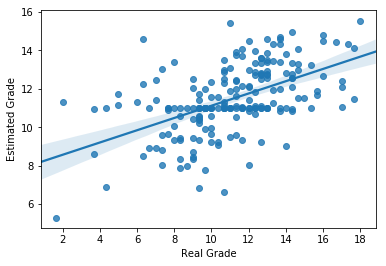

In [108]:
y_pred_test_NN_inv = YScaler.inverse_transform(y_pred_test_NN)
y_test_inv = YScaler.inverse_transform(y_test)
ax = sns.regplot(x=y_test_inv.reshape(len(y_test),), y=y_pred_test_NN_inv.reshape(len(y_test),))
ax.set(xlabel='Real Grade', ylabel='Estimated Grade')

In [109]:
session.close()

# Random Forest

We also use random forest regression with number of trees equal to 200

In [110]:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)

Fit a model to RF

In [111]:
model_RF =regressor.fit(X_train, y_train.reshape(len(y_train),))

Compute the prediction values

In [112]:
y_pred_test_RF = regressor.predict(X_test)

Compute mean squarred error of the prediction

In [113]:
metrics.mean_squared_error(y_test, y_pred_test_RF)

0.658930504404581

Computing the correlation between estimated and observed values

In [114]:
CC = np.corrcoef(y_test.reshape(1,len(y_test)),y_pred_test_RF.reshape(1,len(y_test)))
print("Correlation coefficient between predicted value and real value is {}".format(CC[0]))

Correlation coefficient between predicted value and real value is [1.         0.55022674]


[Text(0, 0.5, 'Estimated Grade'), Text(0.5, 0, 'Real Grade')]

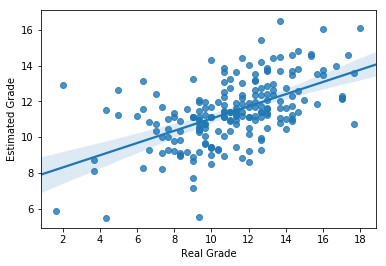

In [115]:
y_pred_test_RF_inv = YScaler.inverse_transform(y_pred_test_RF)
y_test_inv = YScaler.inverse_transform(y_test)
ax = sns.regplot(x=y_test_inv.reshape(len(y_test),), y=y_pred_test_RF_inv.reshape(len(y_test),))
ax.set(xlabel='Real Grade', ylabel='Estimated Grade')

Compute the important features for regression using RF

In [116]:
# Feature Importances
headers = ["name", "score"]
values = sorted(zip(data_all.head(), model_RF.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                    score
failures           0.166237
absences           0.103127
studytime          0.0479753
age                0.0432216
health             0.0396054
Fedu               0.0377412
Walc               0.036108
Medu               0.0355863
goout              0.0340623
freetime           0.0328874
traveltime         0.0259936
famrel             0.0235977
Dalc               0.0168667
famsup_no          0.0161
guardian_mother    0.0144874
Fjob_other         0.0143783
Mjob_other         0.0137988
Fjob_services      0.013139
reason_course      0.0129687
famsize_LE3        0.0123296
Pstatus_T          0.0116911
guardian_father    0.0111954
schoolsup_no       0.0107195
paid_no            0.0105825
Mjob_services      0.00985858
nursery_no         0.00943838
famsup_yes         0.00872518
Mjob_at_home       0.00859977
Fjob_at_home       0.00830482
school_GP          0.00806324
guardian_other     0.00801152
G1                 0.00793026
Pstatus_A          0.00787475
higher_yes 

# Conclusion

* Feature importance results indicates that alcohol consumption is not very helpful in the average grade of the students.

* Number of past classes failure is the most important variable. After it the number of absences is the effective feature for estimating average grade value.

* According to the obtained accuracy random forest is the best method among two others to estimate average grade of the students.

* The higher accuracy of the RF may rely in the number of features in the input space, where RF can more accurately separate the data using the availabe features.

* The main soruces of error are high and low grade values that raise the mse value of the test subset.

* Different method of preprocessing the data, choosing optimal number of hidden node in neural networks and also changing the way of presenting data to the algorithms can change the obtained accuracy.

* According to statistics of the data and also importance of the feature daily and weekend alcohol consumption are not the main criteria for forcasting average grade of the student.
